# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [4]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Creating some data to view and fit

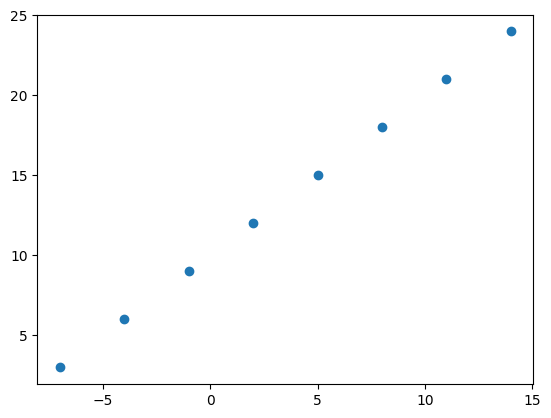

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [6]:
# Relationship that have to learn our neural network
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performances of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 16.6978 - mae: 16.6978
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 16.4165 - mae: 16.4165
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 16.1353 - mae: 16.1353
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 15.8540 - mae: 15.8540
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 15.5728 - mae: 15.5728


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 72ms/step


array([[-8.283191]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 186ms/step - loss: 13.2564 - mae: 13.2564
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1239 - mae: 13.1239
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9914 - mae: 12.9914
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8589 - mae: 12.8589
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7264 - mae: 12.7264
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5939 - mae: 12.5939
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4614 - mae: 12.4614
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3289 - mae: 12.3289
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1964 - mae: 12.1964
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 12.0639 - mae: 12.0639
Epoch 11/100
1/1 [==============================] - 0s 3m

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Let's see if our model prediction has improved...
model.predict([17])

1/1 [==============================] - 0s 69ms/step


array([[30.015877]], dtype=float32)

In [29]:
# Let's see if we can make another to improve our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 259ms/step - loss: 14.6944 - mae: 14.6944
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9958 - mae: 13.9958
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.3031 - mae: 13.3031
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6137 - mae: 12.6137
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9240 - mae: 11.9240
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 11.2305 - mae: 11.2305
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5318 - mae: 10.5318
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.8255 - mae: 9.8255
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1088 - mae: 9.1088
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 8.3802 - mae: 8.3802
Epoch 11/100
1/1 [==============================] - 0s 4ms/st

In [30]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 48ms/step


array([[26.374352]], dtype=float32)

## Evaluating a model